In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/folder final project/data_for_ml.csv')
# jika tidak ditaruh folder manapun, cukup dengan df = pd.read_csv('gdrive/My Drive/data_for_eda.csv')


In [ ]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn,basic car
1,1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct,basic car
2,2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn,basic car
3,3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn,basic car
4,4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm,luxury car


In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.to_csv(r'gdrive/My Drive/folder final project/data_for_dashboard.csv', index = False)


In [ ]:
data =pd.read_csv(r'gdrive/My Drive/folder final project/data_for_dashboard.csv')


In [ ]:
import sqlite3


In [ ]:
df.isna().sum()

Unnamed: 0      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
class_car       0
dtype: int64

In [ ]:
df['drive'].unique()

array(['fwd', '4wd', 'Unknown', 'rwd'], dtype=object)

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147129 entries, 0 to 147128
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         147129 non-null  int64 
 1   year          147129 non-null  int64 
 2   manufacturer  147129 non-null  object
 3   model         147129 non-null  object
 4   condition     147129 non-null  object
 5   cylinders     147129 non-null  object
 6   fuel          147129 non-null  object
 7   odometer      147129 non-null  int64 
 8   title_status  147129 non-null  object
 9   transmission  147129 non-null  object
 10  drive         147129 non-null  object
 11  size          147129 non-null  object
 12  type          147129 non-null  object
 13  paint_color   147129 non-null  object
 14  state         147129 non-null  object
 15  class_car     147129 non-null  object
dtypes: int64(3), object(13)
memory usage: 18.0+ MB


In [ ]:
def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
cat_col= df.select_dtypes(include=['object']).columns
cat_col

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state', 'class_car'],
      dtype='object')

In [ ]:
for i in cat_col:
  print(f"{i}\t: {correlation_ratio(df[i], df['price'])}")

manufacturer	: 0.39859335170062815
model	: 0.8299492637353892
condition	: 0.17947450331371972
cylinders	: 0.3971182917975397
fuel	: 0.23932568279182995
title_status	: 0.12634514292940127
transmission	: 0.09010851258211725
drive	: 0.4471942808072474
size	: 0.1913748790397145
type	: 0.4928870223329115
paint_color	: 0.1246021802022477
state	: 0.22289861428869287
class_car	: 0.8201208490642552


In [ ]:
!pip install dython
import dython
from dython.nominal import associations

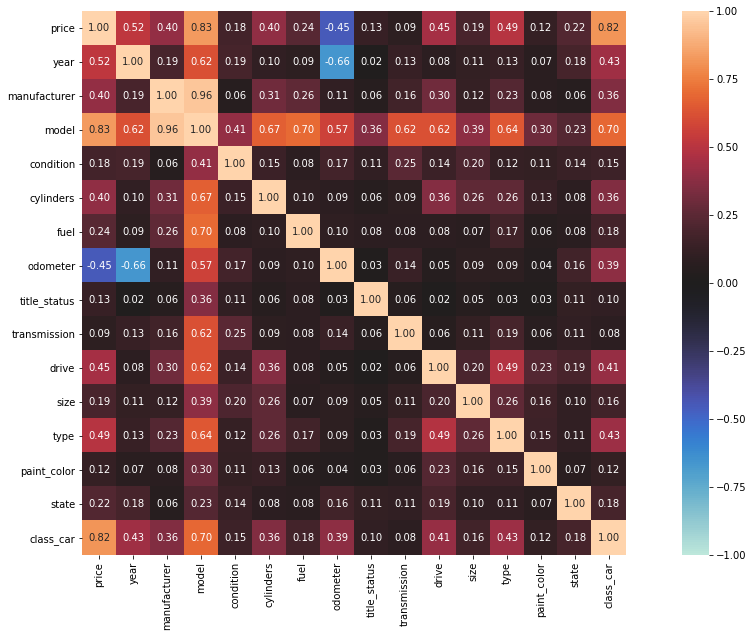

In [ ]:
associations(df, figsize=(20,10))
plt.show()

In [ ]:
df.corr()

,price,year,odometer
price,1.000000,0.521063,-0.449773
year,0.521063,1.000000,-0.663056
odometer,-0.449773,-0.663056,1.000000


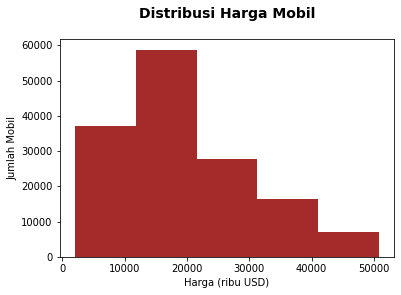

In [ ]:
plt.hist(df["price"], bins = 5, color = "brown")
plt.title("Distribusi Harga Mobil", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel("Jumlah Mobil")
plt.xlabel("Harga (ribu USD)")
plt.show()


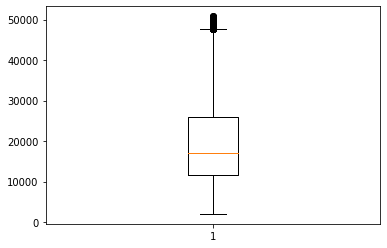

In [ ]:
plt.boxplot(df['price'])
plt.show()

## Feature Engineering

In [ ]:
## Label Encoding Class_car
df['class_car'] = df['class_car'].map({
    'basic car' : 0,
    'luxury car' : 1
})

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn,0
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct,0
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn,0
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn,0
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm,1


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
X = df.drop(columns=['price','model','paint_color'])
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
cat_columns = ['manufacturer','condition','cylinders','fuel','title_status','drive','size','type','state','transmission','class_car']

num_columns = ['year', 'odometer']

In [ ]:
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


## Pipeline

In [ ]:
numerical_pipeline = Pipeline([
        ('scaler', StandardScaler()),
    ('poli', PolynomialFeatures(degree=5))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_LR = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])

Pipeline(memory=None,
         steps=[('encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True))],
         verbose=False)

## Base Model

### 1.1 Linear Regression

In [ ]:
lr_pipe = pipe_LR.fit(X_train, y_train)

In [ ]:
lr_pipe_train = lr_pipe.predict(X_train)
lr_pipe_test = lr_pipe.predict(X_test)


In [ ]:
#linreg Train
LinReg_R2_train = r2_score(y_train, lr_pipe_train)
LinReg_MAE_train = mean_absolute_error(y_train, lr_pipe_train)
LinReg_MSE_train = mean_squared_error(y_train, lr_pipe_train)
LinReg_RMSE_train = np.sqrt(LinReg_MSE_train)
#linreg Test
LinReg_R2_test = r2_score(y_test, lr_pipe_test)
LinReg_MAE_test = mean_absolute_error(y_test, lr_pipe_test)
LinReg_MSE_test = mean_squared_error(y_test, lr_pipe_test)
LinReg_RMSE_test = np.sqrt(LinReg_MSE_test)

In [ ]:
baseModelLR = pd.DataFrame({
    "R2 Score" : [LinReg_R2_train,LinReg_R2_test],
    "MAE" : [LinReg_MAE_train,LinReg_MAE_test],
    "MSE" : [LinReg_MSE_train,LinReg_MSE_test],
    "RMSE" : [LinReg_RMSE_train,LinReg_RMSE_test]
}, index = ["LinReg Train", "LinReg Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelLR)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
LinReg Train,0.804237,3507.307602,2.222262e+07,4714.087832
LinReg Test,0.801392,3491.019660,2.213565e+07,4704.853533


### 1.2 Kneighbors Regressor

In [ ]:
# KNN
KNN_pipe = pipe_KNN.fit(X_train, y_train)

In [ ]:
knn_pipe_train = KNN_pipe.predict(X_train)
knn_pipe_test = KNN_pipe.predict(X_test)


In [ ]:
#KNN Train
knn_R2_train = r2_score(y_train, knn_pipe_train)
knn_MAE_train = mean_absolute_error(y_train, knn_pipe_train)
knn_MSE_train = mean_squared_error(y_train, knn_pipe_train)
knn_RMSE_train = np.sqrt(knn_MSE_train)
#KNN Test
knn_R2_test = r2_score(y_test, knn_pipe_test)
knn_MAE_test = mean_absolute_error(y_test, knn_pipe_test)
knn_MSE_test = mean_squared_error(y_test, knn_pipe_test)
knn_RMSE_test = np.sqrt(knn_MSE_test)

In [ ]:
baseModelKNN = pd.DataFrame({
    "R2 Score" : [knn_R2_train,knn_R2_test],
    "MAE" : [knn_MAE_train,knn_MAE_test],
    "MSE" : [knn_MSE_train,knn_MSE_test],
    "RMSE" : [knn_RMSE_train,knn_RMSE_test]
}, index = ["KNN Train", "KNN Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelKNN)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
KNN Train,0.926954,1830.933327,8.292020e+06,2879.586849
KNN Test,0.880119,2358.071563,1.336116e+07,3655.291630


### 1.3 XGB

In [ ]:
# xgb
xgb_pipe = pipe_XGB.fit(X_train, y_train)

[22:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_pipe_train = xgb_pipe.predict(X_train)
xgb_pipe_test = xgb_pipe.predict(X_test)


In [ ]:
#xgb Train
xgb_R2_train = r2_score(y_train, xgb_pipe_train)
xgb_MAE_train = mean_absolute_error(y_train, xgb_pipe_train)
xgb_MSE_train = mean_squared_error(y_train, xgb_pipe_train)
xgb_RMSE_train = np.sqrt(xgb_MSE_train)
#KNN Test
xgb_R2_test = r2_score(y_test, xgb_pipe_test)
xgb_MAE_test = mean_absolute_error(y_test, xgb_pipe_test)
xgb_MSE_test = mean_squared_error(y_test, xgb_pipe_test)
xgb_RMSE_test = np.sqrt(xgb_MSE_test)

In [ ]:
baseModelxgb = pd.DataFrame({
    "R2 Score" : [xgb_R2_train,xgb_R2_test],
    "MAE" : [xgb_MAE_train,xgb_MAE_test],
    "MSE" : [xgb_MSE_train,xgb_MSE_test],
    "RMSE" : [xgb_RMSE_train,xgb_RMSE_test]
}, index = ["XGB Train", "XGB Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgb)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
XGB Train,0.820873,3392.959954,2.033409e+07,4509.333434
XGB Test,0.816556,3388.525018,2.044551e+07,4521.671703


### 1.4 Decision Tree

In [ ]:
#dt
dt_pipe = pipe_DT.fit(X_train, y_train)

In [ ]:
dt_pipe_train = dt_pipe.predict(X_train)
dt_pipe_test = dt_pipe.predict(X_test)

In [ ]:
#dt Train
dt_R2_train = r2_score(y_train, dt_pipe_train)
dt_MAE_train = mean_absolute_error(y_train, dt_pipe_train)
dt_MSE_train = mean_squared_error(y_train, dt_pipe_train)
dt_RMSE_train = np.sqrt(dt_MSE_train)
#dt Test
dt_R2_test = r2_score(y_test, dt_pipe_test)
dt_MAE_test = mean_absolute_error(y_test, dt_pipe_test)
dt_MSE_test = mean_squared_error(y_test, dt_pipe_test)
dt_RMSE_test = np.sqrt(dt_MSE_test)

In [ ]:
baseModeldt = pd.DataFrame({
    "R2 Score" : [dt_R2_train,dt_R2_test],
    "MAE" : [dt_MAE_train,dt_MAE_test],
    "MSE" : [dt_MSE_train,dt_MSE_test],
    "RMSE" : [dt_RMSE_train,dt_RMSE_test]
}, index = ["DT Train", "DT Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldt)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train,0.996141,114.818561,4.380655e+05,661.865146
DT Test,0.867175,2001.378613,1.480384e+07,3847.575362


### 1.5 Random Forest Regressor

In [ ]:
#rf
rf_pipe = pipe_RF.fit(X_train, y_train)

In [ ]:
rf_pipe_train = rf_pipe.predict(X_train)
rf_pipe_test = rf_pipe.predict(X_test)


In [ ]:
#rf Train
rf_R2_train = r2_score(y_train, rf_pipe_train)
rf_MAE_train = mean_absolute_error(y_train, rf_pipe_train)
rf_MSE_train = mean_squared_error(y_train, rf_pipe_train)
rf_RMSE_train = np.sqrt(rf_MSE_train)
#rf Test
rf_R2_test = r2_score(y_test, rf_pipe_test)
rf_MAE_test = mean_absolute_error(y_test, rf_pipe_test)
rf_MSE_test = mean_squared_error(y_test, rf_pipe_test)
rf_RMSE_test = np.sqrt(rf_MSE_test)

In [ ]:
baseModelrf = pd.DataFrame({
    "R2 Score" : [rf_R2_train,rf_R2_test],
    "MAE" : [rf_MAE_train,rf_MAE_test],
    "MSE" : [rf_MSE_train,rf_MSE_test],
    "RMSE" : [rf_RMSE_train,rf_RMSE_test]
}, index = ["RF Train", "RF Test"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelrf)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
RF Train,0.986525,703.443894,1.529651e+06,1236.790432
RF Test,0.921803,1751.494464,8.715337e+06,2952.174955


### 1.6 summary of Base Model

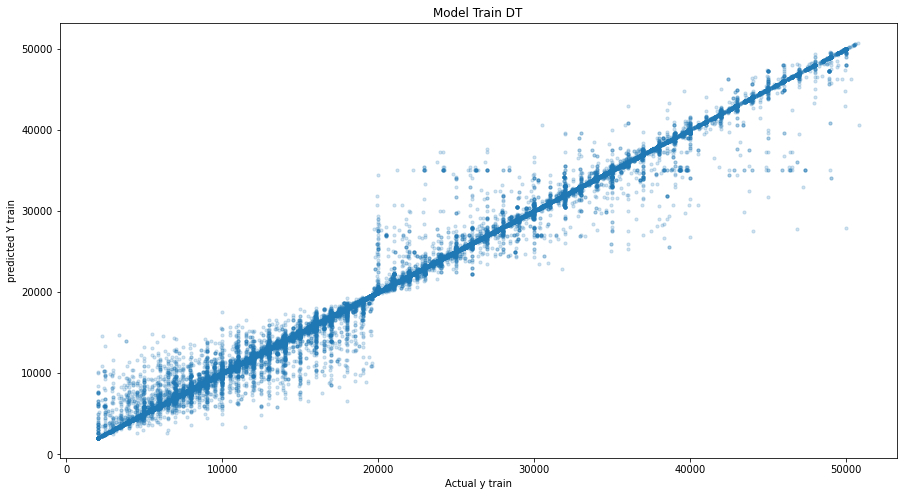

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,dt_pipe_train,s=10, alpha=0.2)
plt.title('Model Train DT')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

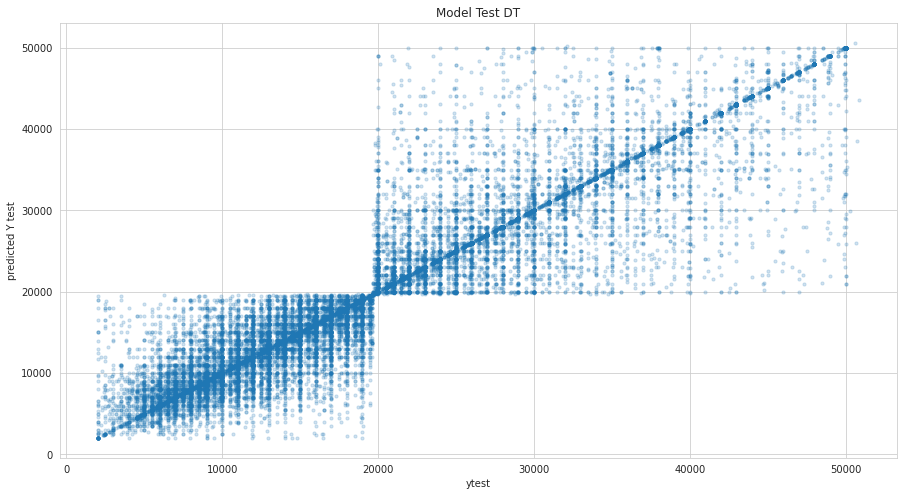

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dt_pipe_test,s=10, alpha=0.2)
plt.title('Model Test DT')
plt.xlabel('ytest')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

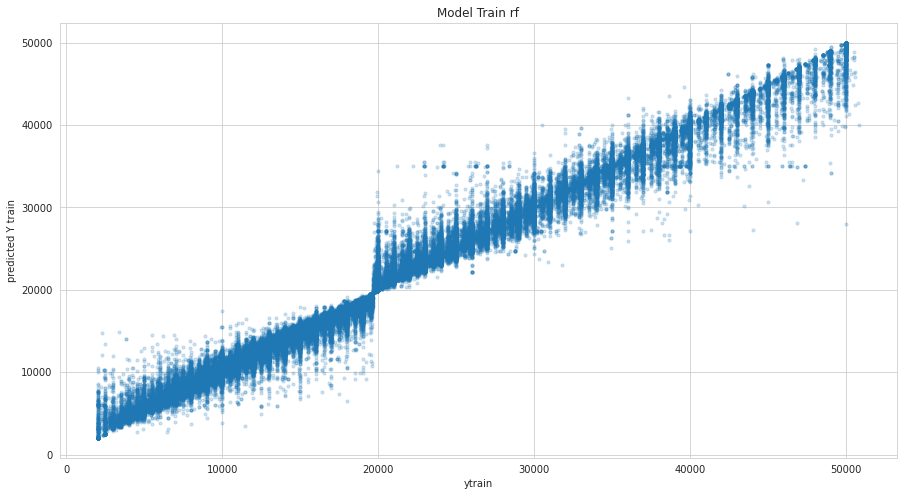

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,rf_pipe_train,s=10, alpha=0.2)
plt.title('Model Train rf')
plt.xlabel('ytrain')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

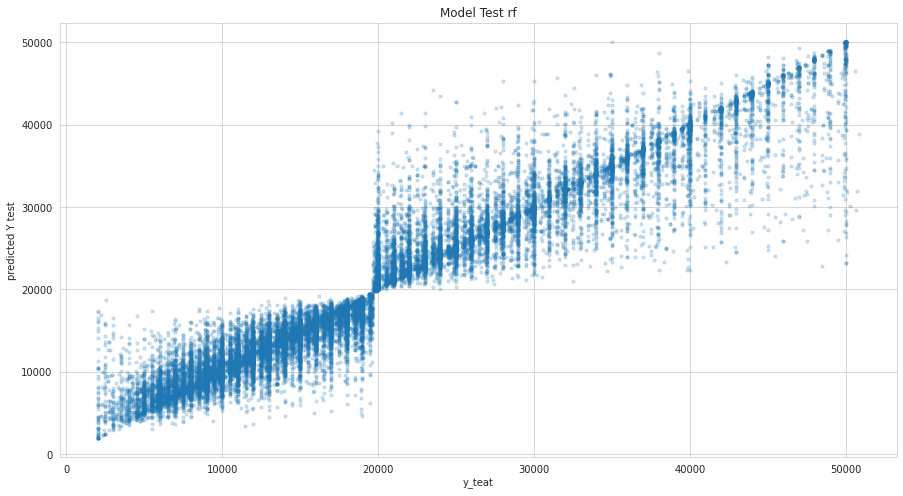

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rf_pipe_test,s=10, alpha=0.2)
plt.title('Model Test rf')
plt.xlabel('y_teat')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

Setelah dilakukan tuning, dapat dilihat model 3 model terbaik yaitu  RF, KNN, dan DT. memiliki skor diatas 79, sehingga akan dilakukan lagi hypertuning agar tidak overfit

## Hyper Tuning

KNN Tuning

In [ ]:
pipe_KNN.get_params()

In [ ]:
param_KNN = {
    'prep__numeric__poli__degree': [2,3,4],
    'algo__n_neighbors': [5,10,20],
    'algo__weights': ['uniform','distance'],
    'algo__p': [2,1]
}

In [ ]:
model_KNN = RandomizedSearchCV(estimator = pipe_KNN, param_distributions=param_KNN, n_jobs = -1, cv=3, verbose =1)


In [ ]:
KNN_tuned = model_KNN.best_estimator_

In [ ]:
model_KNN.best_params_

In [ ]:
knn_pipe_train_tuned = KNN_tuned.predict(X_train)
knn_pipe_test_tuned = KNN_tuned.predict(X_test)

In [ ]:
#knn Train tuned
knn_R2_train_tuned = r2_score(y_train, knn_pipe_train_tuned)
knn_MAE_train_tuned = mean_absolute_error(y_train, knn_pipe_train_tuned)
knn_MSE_train_tuned = mean_squared_error(y_train, knn_pipe_train_tuned)
knn_RMSE_train_tuned = np.sqrt(knn_MSE_train_tuned)
#knn Test tuned
knn_R2_test_tuned = r2_score(y_test, knn_pipe_test_tuned)
knn_MAE_test_tuned = mean_absolute_error(y_test, knn_pipe_test_tuned)
knn_MSE_test_tuned = mean_squared_error(y_test, knn_pipe_test_tuned)
knn_RMSE_test_tuned = np.sqrt(knn_MSE_test_tuned)

In [ ]:
baseModelknnTuned = pd.DataFrame({
    "R2 Score" : [knn_R2_train_tuned,knn_R2_test_tuned],
    "MAE" : [knn_MAE_train_tuned,knn_MAE_test_tuned],
    "MSE" : [knn_MSE_train_tuned,knn_MSE_test_tuned],
    "RMSE" : [knn_RMSE_train_tuned,knn_RMSE_test_tuned]
}, index = ["KNN Train Tuned", "KNN Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelknnTuned)

#### 2.1 DT Tuning

In [ ]:
pipe_DT.get_params()

{'algo': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'algo__ccp_alpha': 0.0,
 'algo__criterion': 'mse',
 'algo__max_depth': None,
 'algo__max_features': None,
 'algo__max_leaf_nodes': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__presort': 'deprecated',
 'algo__random_state': None,
 'algo__splitter': 'best',
 'memory': None,
 'prep': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('numeric'

In [ ]:
param_DT = {'algo__max_depth':[ None,1, 3, 5 ],
            'algo__min_samples_split':[ 17,21,31],
            'algo__min_samples_leaf':[ 7,10,15],
            'algo__max_features':[None,0.1,0.2,0.3]}


In [ ]:
model_DT = RandomizedSearchCV(estimator = pipe_DT, param_distributions=param_DT, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

In [ ]:
DT_tuned = model_DT.best_estimator_

In [ ]:
model_DT.best_params_

{'algo__max_depth': None,
 'algo__max_features': 0.3,
 'algo__min_samples_leaf': 15,
 'algo__min_samples_split': 31}

In [ ]:
dt_pipe_train_tuned = DT_tuned.predict(X_train)
dt_pipe_test_tuned = DT_tuned.predict(X_test)

In [ ]:
#dt Train tuned
dt_R2_train_tuned = r2_score(y_train, dt_pipe_train_tuned)
dt_MAE_train_tuned = mean_absolute_error(y_train, dt_pipe_train_tuned)
dt_MSE_train_tuned = mean_squared_error(y_train, dt_pipe_train_tuned)
dt_RMSE_train_tuned = np.sqrt(dt_MSE_train_tuned)
#dt Test tuned
dt_R2_test_tuned = r2_score(y_test, dt_pipe_test_tuned)
dt_MAE_test_tuned = mean_absolute_error(y_test, dt_pipe_test_tuned)
dt_MSE_test_tuned = mean_squared_error(y_test, dt_pipe_test_tuned)
dt_RMSE_test_tuned = np.sqrt(dt_MSE_test_tuned)

In [ ]:
baseModeldtTuned = pd.DataFrame({
    "R2 Score" : [dt_R2_train_tuned,dt_R2_test_tuned],
    "MAE" : [dt_MAE_train_tuned,dt_MAE_test_tuned],
    "MSE" : [dt_MSE_train_tuned,dt_MSE_test_tuned],
    "RMSE" : [dt_RMSE_train_tuned,dt_RMSE_test_tuned]
}, index = ["DT Train Tuned", "DT Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModeldtTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
DT Train Tuned,0.876023,2636.763782,1.407360e+07,3751.479263
DT Test Tuned,0.853269,2840.060650,1.635370e+07,4043.970731


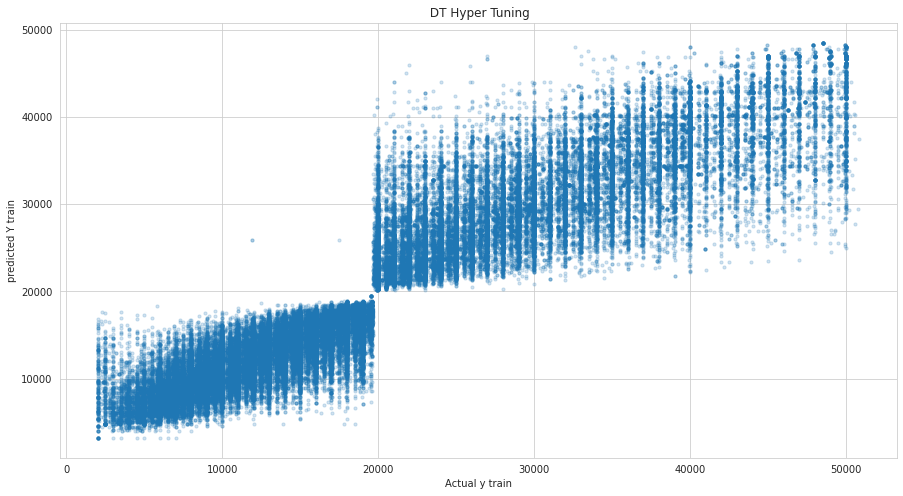

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,dt_pipe_train_tuned,s=10, alpha=0.2)
plt.title(' DT Hyper Tuning')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

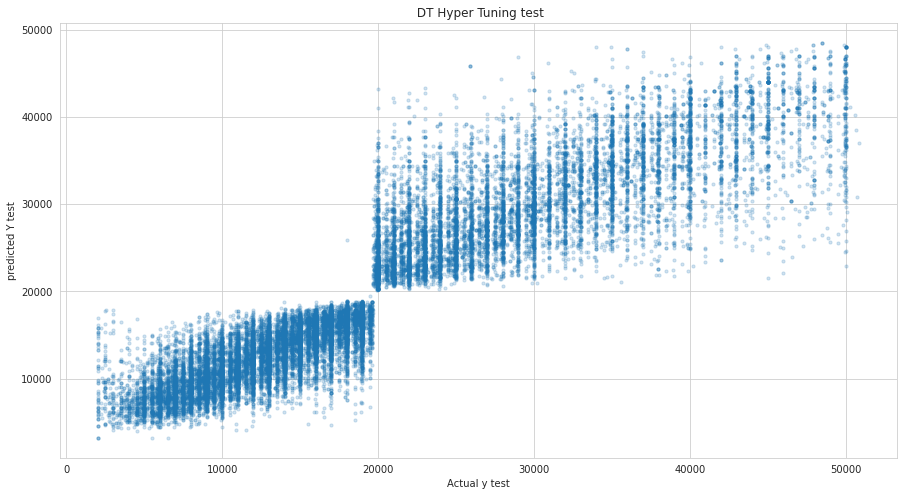

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dt_pipe_test_tuned,s=10, alpha=0.2)
plt.title(' DT Hyper Tuning test')
plt.xlabel('Actual y test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

#### 2.2 Random Forest

In [ ]:
pipe_RF.get_params()

{'algo': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'algo__bootstrap': True,
 'algo__ccp_alpha': 0.0,
 'algo__criterion': 'mse',
 'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__max_leaf_nodes': None,
 'algo__max_samples': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__n_estimators': 100,
 'algo__n_jobs': None,
 'algo__oob_score': False,
 'algo__random_state': None,
 'algo__verbo

In [ ]:
param_RF = {'algo__max_depth':[None, 5, 9],
            'algo__min_samples_split':[2, 5, 9],
            'algo__min_samples_leaf':[1, 5, 10],
            'algo__max_features':[None,0.2,0.5],
           'algo__n_estimators':[100, 200, 450]}

In [ ]:
model_RF = RandomizedSearchCV(estimator = pipe_RF, param_distributions=param_RF, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 252.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

### 2.3. XGB 

In [ ]:
pipe_XGB.get_params()

{'algo': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 'algo__base_score': 0.5,
 'algo__booster': 'gbtree',
 'algo__colsample_bylevel': 1,
 'algo__colsample_bynode': 1,
 'algo__colsample_bytree': 1,
 'algo__gamma': 0,
 'algo__importance_type': 'gain',
 'algo__learning_rate': 0.1,
 'algo__max_delta_step': 0,
 'algo__max_depth': 3,
 'algo__min_child_weight': 1,
 'algo__missing': None,
 'algo__n_estimators': 100,
 'algo__n_jobs': 1,
 'algo__nthread': None,
 'algo__objective': 'reg:linear',
 'algo__random_state': 0,
 'algo__reg_alpha': 0,
 'algo__reg_lam

In [ ]:
param_XGB = {'algo__max_depth':[3,5,7,9],'algo__learning_rate':[0.1,0.2,0.5,1],'algo__n_estimators':[100,200,300],'algo__gamma':[0,3,5]}


In [ ]:
model_XGB = RandomizedSearchCV(estimator = pipe_XGB, param_distributions=param_XGB, n_jobs = -1, cv=3, verbose =1)


In [ ]:
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.9min finished


[22:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                StandardScaler(copy=True,
                                                                                                   

In [ ]:
XGB_tuned = model_XGB.best_estimator_

In [ ]:
model_XGB.best_params_

{'algo__gamma': 5,
 'algo__learning_rate': 0.2,
 'algo__max_depth': 9,
 'algo__n_estimators': 300}

In [ ]:
xgb_pipe_train_tuned = XGB_tuned.predict(X_train)
xgb_pipe_test_tuned = XGB_tuned.predict(X_test)

In [ ]:
#xgb Train tuned
xgb_R2_train_tuned = r2_score(y_train, xgb_pipe_train_tuned)
xgb_MAE_train_tuned = mean_absolute_error(y_train, xgb_pipe_train_tuned)
xgb_MSE_train_tuned = mean_squared_error(y_train, xgb_pipe_train_tuned)
xgb_RMSE_train_tuned = np.sqrt(xgb_MSE_train_tuned)
#dt Test tuned
xgb_R2_test_tuned = r2_score(y_test, xgb_pipe_test_tuned)
xgb_MAE_test_tuned = mean_absolute_error(y_test, xgb_pipe_test_tuned)
xgb_MSE_test_tuned = mean_squared_error(y_test, xgb_pipe_test_tuned)
xgb_RMSE_test_tuned = np.sqrt(xgb_MSE_test_tuned)

In [ ]:
baseModelxgbTuned = pd.DataFrame({
    "R2 Score" : [xgb_R2_train_tuned,xgb_R2_test_tuned],
    "MAE" : [xgb_MAE_train_tuned,xgb_MAE_test_tuned],
    "MSE" : [xgb_MSE_train_tuned,xgb_MSE_test_tuned],
    "RMSE" : [xgb_RMSE_train_tuned,xgb_RMSE_test_tuned]
}, index = ["xgb Train Tuned", "xgb Test Tuned"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelxgbTuned)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
xgb Train Tuned,0.954005,1592.793763,5.221236e+06,2285.002466
xgb Test Tuned,0.913095,2113.238704,9.685868e+06,3112.212695


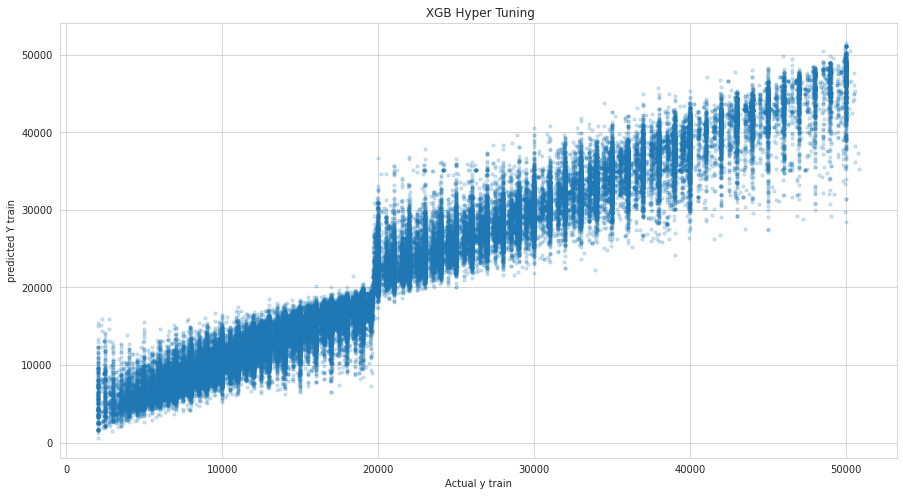

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,xgb_pipe_train_tuned,s=10, alpha=0.2)
plt.title(' XGB Hyper Tuning')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

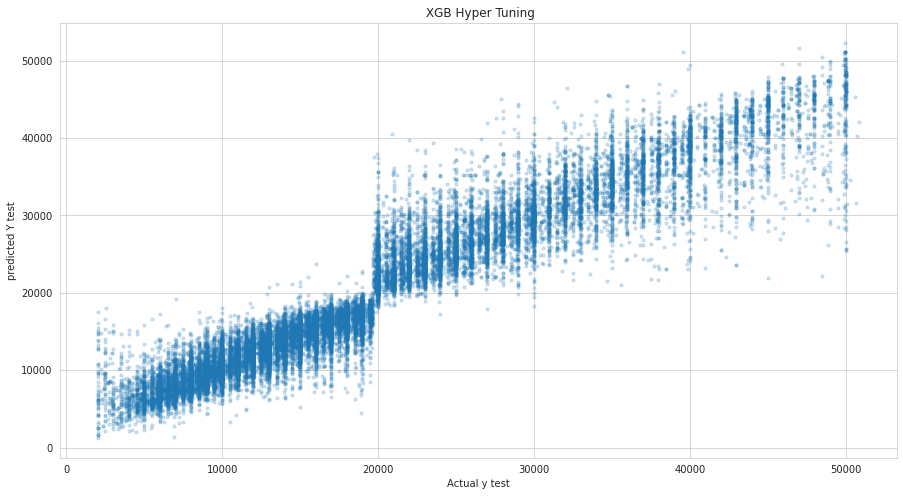

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,xgb_pipe_test_tuned,s=10, alpha=0.2)
plt.title(' XGB Hyper Tuning')
plt.xlabel('Actual y test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')


In [ ]:
data_arif = [{
    'year' : 2013,
    'manufacturer': 'honda',
    'model': 'supra',
    'condition': 'excellent',
    'cylinders': '4 cylinders',
    'fuel': 'diesel',
    'odometer': 2543,
    'title_status': 'clean',
    'transmission': 'automatic',
    'drive' : '4wd',
    'size' :'full-size',
    'type': 'SUV',
    'paint_color': 'grey',
    'state' : 'mn',
    'class_car' : '1'
}]

In [ ]:
arif = pd.DataFrame(data_arif, index=[1])

In [ ]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,class_car
17471,2012,ford,good,6 cylinders,gas,111649,clean,automatic,rwd,Unknown,pickup,az,0
104455,2012,ford,unknown,6 cylinders,gas,17253,clean,other,rwd,Unknown,truck,in,0
43909,2015,nissan,unknown,4 cylinders,gas,25108,clean,other,rwd,Unknown,truck,al,0
69172,2018,hyundai,unknown,4 cylinders,gas,19635,clean,other,fwd,Unknown,SUV,tx,1
17380,2013,kia,unknown,other,gas,63198,clean,automatic,Unknown,Unknown,other,oh,0


In [ ]:
model_XGB.predict(arif)[0]

24544.404

In [ ]:
X_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
46757,2014,volkswagen,excellent,other,gas,50990,clean,manual,fwd,Unknown,sedan,tn
54274,2016,kia,good,other,gas,28613,clean,automatic,fwd,Unknown,sedan,mi
102051,2013,toyota,excellent,4 cylinders,electric,92000,clean,automatic,fwd,compact,hatchback,mt
74972,2018,acura,unknown,other,gas,35235,clean,automatic,Unknown,Unknown,other,nj
106672,2017,volkswagen,like new,4 cylinders,gas,44893,clean,automatic,fwd,mid-size,SUV,tx
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2017,infiniti,unknown,other,gas,38222,clean,automatic,rwd,Unknown,other,al
103694,2017,chevrolet,unknown,4 cylinders,other,38536,clean,automatic,fwd,Unknown,hatchback,fl
131932,2014,chevrolet,unknown,other,other,52821,clean,automatic,Unknown,full-size,sedan,id
146867,2016,ford,unknown,4 cylinders,gas,25367,rebuilt,automatic,fwd,Unknown,van,mi


In [ ]:
import joblib

In [ ]:
joblib.dump(XGB_tuned, 'Model_XGB_tuned_ver2.1')


['Model_XGB_tuned_ver2.1']

In [ ]:
joblib.dump(DT_tuned, 'Model_DT_tuned_vers2')


['Model_DT_tuned_vers2']